In [2]:
#!pip install pandas scipy seaborn
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# import pandas as pd

# Чтение данных

Была небольшая проблема с кодировками, изначально файл был в cp1251, локально в vs code при encoding='cp1251' отображалось нормально, но когда развернул jupyter в докере символы нормально не указывались, поэтому я предварительно прогнал файл и работал с ним
```python
import pandas as pd
df = pd.read_csv('Статистика.csv', encoding='cp1251')
df.to_csv('Статистика.csv',index=False)



In [3]:
df = pd.read_csv('data/Статистика.csv')
df

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М
...,...,...,...
232,5,30,М
233,4,36,Ж
234,2,60,Ж
235,2,44,Ж


# EDA

Выводы: 
1. Данные чистые, без пропусков
2. 

In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB
None
       Количество больничных дней     Возраст
count                  237.000000  237.000000
mean                     3.257384   40.181435
std                      1.807821    6.875157
min                      0.000000   23.000000
25%                      2.000000   36.000000
50%                      3.000000   41.000000
75%                      4.000000   45.000000
max                      8.000000   60.000000


In [5]:
print("Общая информация о данных:")
print(df.info())

print("\nСтатистическое описание:")
print(df.describe())

print("\nПроверка на пропуски:")
print(df.isnull().sum())

Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Количество больничных дней  237 non-null    int64 
 1   Возраст                     237 non-null    int64 
 2   Пол                         237 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.7+ KB
None

Статистическое описание:
       Количество больничных дней     Возраст
count                  237.000000  237.000000
mean                     3.257384   40.181435
std                      1.807821    6.875157
min                      0.000000   23.000000
25%                      2.000000   36.000000
50%                      3.000000   41.000000
75%                      4.000000   45.000000
max                      8.000000   60.000000

Проверка на пропуски:
Количество больничных дней    0
Возраст                       0
Пол    

__Данные чистые, пропусков нет, можно посмотреть на распредления признаков__

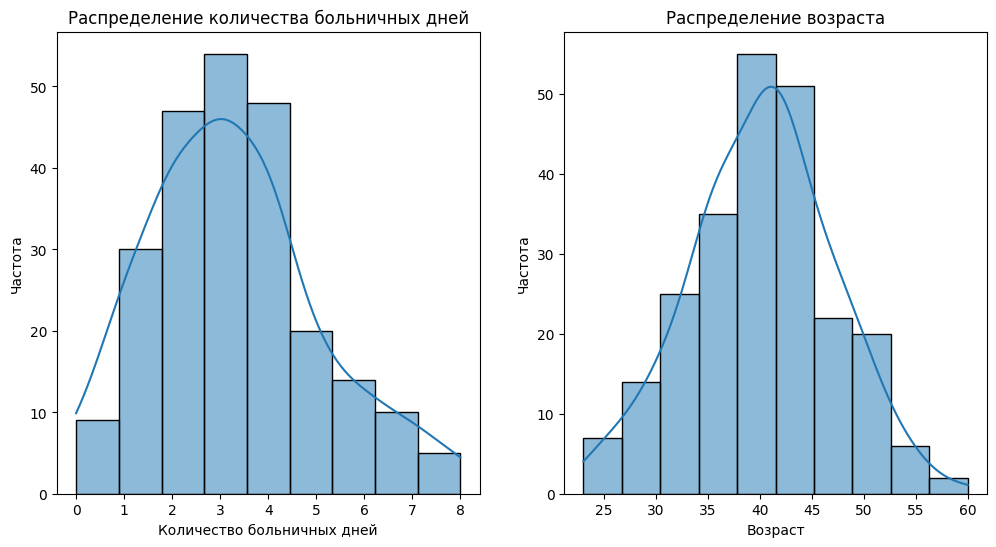

In [6]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Количество больничных дней'], bins=9, kde=True)
plt.title('Распределение количества больничных дней')
plt.xlabel('Количество больничных дней')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.histplot(df['Возраст'], bins= 10 ,kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота');

__Количество больничных дней__ - Распределение напоминает нормальное, но с асимметрией вправо


__Возраст__ - Распределение визуально нормальное

<Figure size 640x480 with 0 Axes>

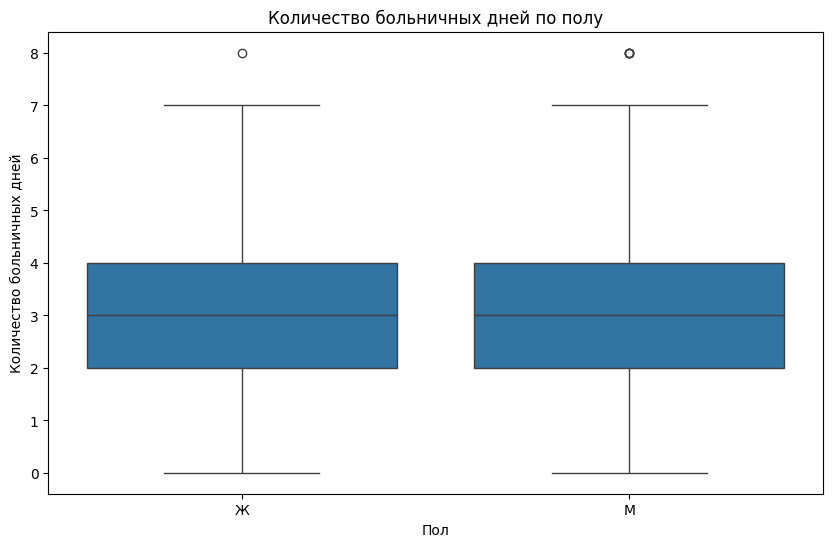

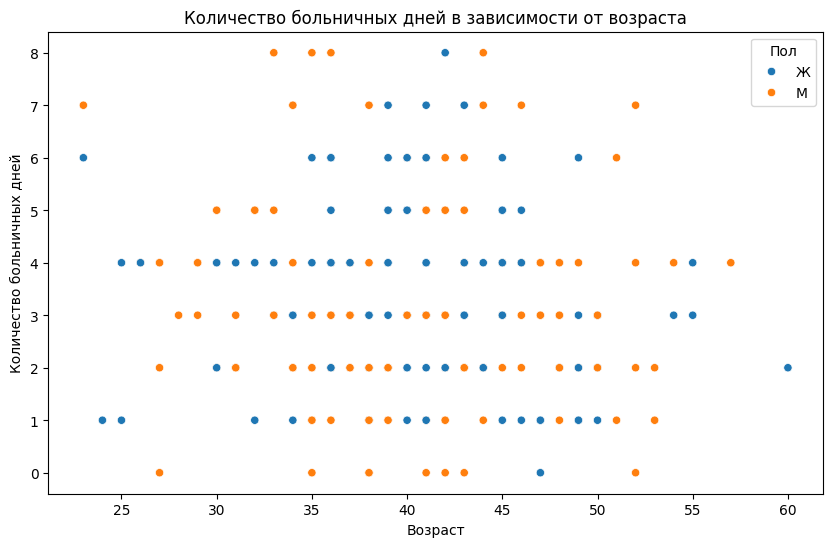

In [7]:
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Пол', y='Количество больничных дней', data=df)
plt.title('Количество больничных дней по полу')
plt.xlabel('Пол')
plt.ylabel('Количество больничных дней')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Возраст', y='Количество больничных дней', hue='Пол', data=df)
plt.title('Количество больничных дней в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество больничных дней')
plt.show();

# Проверка гипотезы 1

__Результат:__ Количество Больничных дней распределено не нормально, поэтому по тесту Манна-Уитни можно сделать вывод, что разницы между мучинами и женщинами нет.

Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.

Для начала необходимо проверить, как распределены пропущенные дни в мужской и женской группе, а затем провести тест либо __т-тест__, если данные нормальные, либо Тест __Манна-Уитни__, если данные не нормальные. Также, если данные распределены нормально, можно выбрать либо стандратный т-тест, либо т-тест Уэлча(если дисперсии не равны).

Проверять распределение можно по __критерию Шапиро__, т.к. он подходит для небольших выборок. 

В итоге:

__Тест Шапиро-Уилка__

__Нулевая гипотеза (H₀):__ Данные имеют нормальное распределение.

__Альтернативная гипотеза (H₁):__ Данные не имеют нормального распределения.

__Для t-теста Стьюдента:__

__Нулевая гипотеза (H₀):__ Среднее количество больничных дней в группе 1 меньше или равно среднему количеству больничных дней в группе 2.

__Альтернативная гипотеза (H₁):__ Среднее количество больничных дней в группе 1 больше, чем в группе 2.

__Для теста Манна-Уитни:__

__Нулевая гипотеза (H₀):__ Распределение количества больничных дней в группе 1 не смещено вправо относительно распределения в группе 2.

__Альтернативная гипотеза (H₁):__ Распределение количества больничных дней в группе 1 смещено вправо относительно распределения в группе 2.


In [8]:
def sex_test_sick_days_hypothesis(df, work_days):
    
    df_filtered = df[df['Количество больничных дней'] > work_days]

    men_days = df_filtered[df_filtered['Пол'] == 'М']['Количество больничных дней']
    women_days = df_filtered[df_filtered['Пол'] == 'Ж']['Количество больничных дней']

    shapiro_men = shapiro(men_days)
    shapiro_women = shapiro(women_days)

    print(f"Тест Шапиро-Уилка для мужчин: p-значение = {shapiro_men.pvalue}")
    print(f"Тест Шапиро-Уилка для женщин: p-значение = {shapiro_women.pvalue}")

    if shapiro_men.pvalue > 0.05 and shapiro_women.pvalue > 0.05:
        levene_stat, levene_p = levene(men_days, women_days)
        print(f"Тест Левена: p-значение = {levene_p}")

        if levene_p > 0.05:
            stat, p_value = ttest_ind(men_days, women_days, alternative='greater', equal_var=True)
            test_used = "t-test (equal variances)"
        else:
            stat, p_value = ttest_ind(men_days, women_days, alternative='greater', equal_var=False)
            test_used = "Welch's t-test (unequal variances)"
    else:
        stat, p_value = mannwhitneyu(men_days, women_days, alternative='greater')
        test_used = "Mann-Whitney U test"

    print(f"Использованный тест: {test_used}")
    print(f"Статистика теста: {stat}, p-значение: {p_value}")
    
    if p_value < 0.05:
        print("Гипотеза подтверждена: мужчины пропускают больше рабочих дней по болезни, чем женщины.")
    else:
        print("Нет значимых различий в количестве пропусков по болезни между мужчинами и женщинами.")
        
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Пол', y='Количество больничных дней', data=df_filtered)
    plt.title('Boxplot количества больничных дней для мужчин и женщин')
    plt.xlabel('Пол')
    plt.ylabel('Количество больничных дней')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.kdeplot(men_days, label='Мужчины', fill=True, alpha=0.5)
    sns.kdeplot(women_days, label='Женщины', fill=True, alpha=0.5)
    plt.title('Распределение количества больничных дней')
    plt.xlabel('Количество больничных дней')
    plt.ylabel('Плотность')
    plt.legend()
    plt.show()

Тест Шапиро-Уилка для мужчин: p-значение = 7.51328390607522e-09
Тест Шапиро-Уилка для женщин: p-значение = 5.730583137143745e-07
Использованный тест: Mann-Whitney U test
Статистика теста: 2829.0, p-значение: 0.4774086565269439
Нет значимых различий в количестве пропусков по болезни между мужчинами и женщинами.


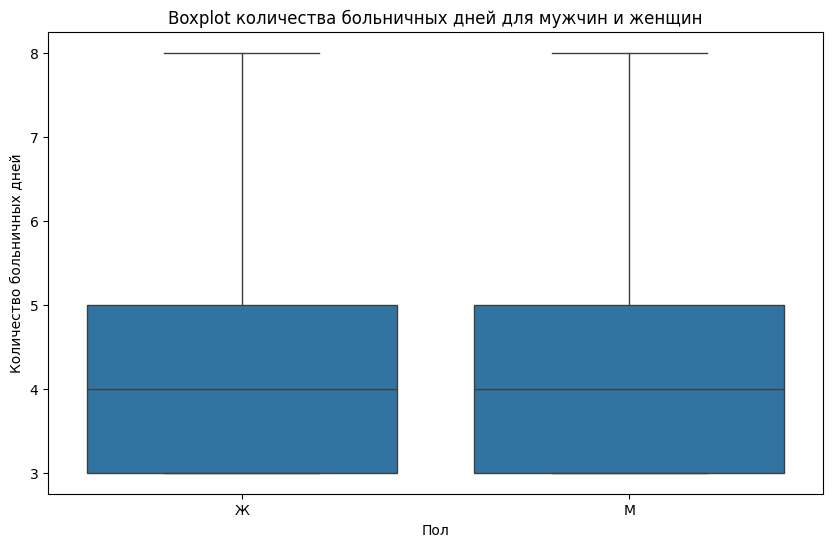

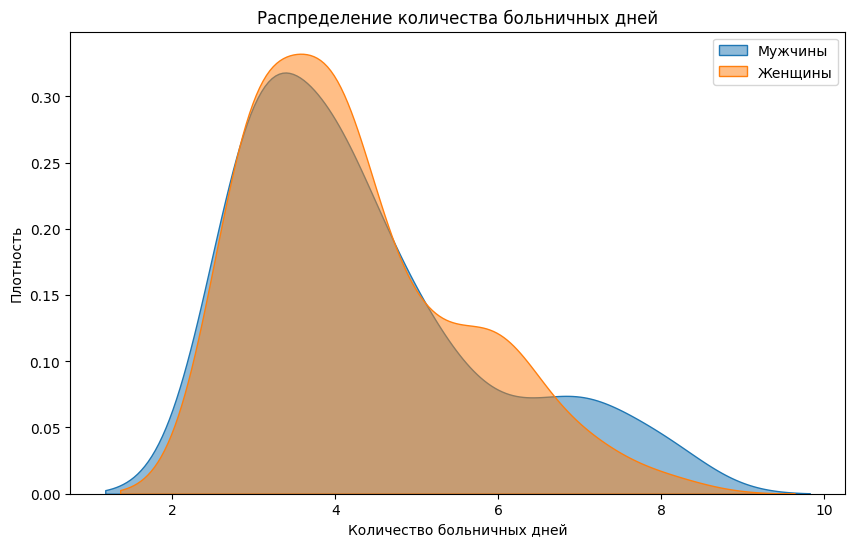

In [9]:
sex_test_sick_days_hypothesis(df, 2)

__Вывод:__ Количество Больничных дней распределено не нормально, поэтому по тесту Манна-Уитни можно сделать вывод, что разницы между мучинами и женщинами нет.

# Проверка гипотезы 2

Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

__Результат:__ Количество Больничных дней распределено не нормально, поэтому по тесту Манна-Уитни можно сделать вывод, что разницы между взрослыми и молодыми нет.

В целом гипотеза, проверяется аналогично предыдущей, поэтому необходимо модифицировать фильтрацию, а тесты оставить те же.

Для начала необходимо проверить, как распределены пропущенные дни в возрастной и молодой группе, а затем провести тест либо __т-тест__, если данные нормальные, либо Тест __Манна-Уитни__, если данные не нормальные. Также, если данные распределены нормально, можно выбрать либо стандратный т-тест, либо т-тест Уэлча(если дисперсии не равны).

Проверять распределение можно по __критерию Шапиро__, т.к. он подходит для небольших выборок. 

В итоге:

__Тест Шапиро-Уилка__

__Нулевая гипотеза (H₀):__ Данные имеют нормальное распределение.

__Альтернативная гипотеза (H₁):__ Данные не имеют нормального распределения.

__Для t-теста Стьюдента:__

__Нулевая гипотеза (H₀):__ Среднее количество больничных дней в группе 1 меньше или равно среднему количеству больничных дней в группе 2.

__Альтернативная гипотеза (H₁):__ Среднее количество больничных дней в группе 1 больше, чем в группе 2.

__Для теста Манна-Уитни:__

__Нулевая гипотеза (H₀):__ Распределение количества больничных дней в группе 1 не смещено вправо относительно распределения в группе 2.

__Альтернативная гипотеза (H₁):__ Распределение количества больничных дней в группе 1 смещено вправо относительно распределения в группе 2.


In [10]:
def year_test_sick_days_hypothesis(df, work_days, age):
    
    df_filtered = df[df['Количество больничных дней'] > work_days].copy()
    df_filtered.loc[:, 'Возрастная группа'] = df_filtered['Возраст'].apply(lambda x: 'Взрослые' if x > age else 'Молодые')
    
    old_days = df_filtered[df_filtered['Возрастная группа'] == 'Взрослые']['Количество больничных дней']
    young_days = df_filtered[df_filtered['Возрастная группа'] == 'Молодые']['Количество больничных дней']

    shapiro_older = shapiro(old_days)
    shapiro_younger = shapiro(young_days)

    print(f"Тест Шапиро-Уилка для Взрослых: p-значение = {shapiro_older.pvalue}")
    print(f"Тест Шапиро-Уилка для Молодых: p-значение = {shapiro_younger.pvalue}")

    if shapiro_older.pvalue > 0.05 and shapiro_younger.pvalue > 0.05:
        levene_stat, levene_p = levene(old_days, young_days)
        print(f"Тест Левена: p-значение = {levene_p}")

        if levene_p > 0.05:
            stat, p_value = ttest_ind(old_days, young_days, alternative='greater', equal_var=True)
            test_used = "t-test (equal variances)"
        else:
            stat, p_value = ttest_ind(old_days, young_days, alternative='greater', equal_var=False)
            test_used = "Welch's t-test (unequal variances)"
    else:
        stat, p_value = mannwhitneyu(old_days, young_days, alternative='greater')
        test_used = "Mann-Whitney U test"

    print(f"Использованный тест: {test_used}")
    print(f"Статистика теста: {stat}, p-значение: {p_value}")
    
    if p_value < 0.05:
        print("Гипотеза подтверждена: Взрослые пропускают больше рабочих дней по болезни, чем Молодые.")
    else:
        print("Нет значимых различий в количестве пропусков по болезни между Взрослыми и Молодыми.")
        
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Возрастная группа', y='Количество больничных дней', data=df_filtered)
    plt.title('Boxplot количества больничных дней для Взрослых и Молодых')
    plt.xlabel('Пол')
    plt.ylabel('Количество больничных дней')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.kdeplot(old_days, label='Взррослые', fill=True, alpha=0.5)
    sns.kdeplot(young_days, label='Молодые', fill=True, alpha=0.5)
    plt.title('Распределение количества больничных дней')
    plt.xlabel('Количество больничных дней')
    plt.ylabel('Плотность')
    plt.legend()
    plt.show()

Тест Шапиро-Уилка для Взрослых: p-значение = 2.4903508757985295e-10
Тест Шапиро-Уилка для Молодых: p-значение = 5.5304204270799383e-05
Использованный тест: Mann-Whitney U test
Статистика теста: 1888.0, p-значение: 0.7971402175825377
Нет значимых различий в количестве пропусков по болезни между Взрослыми и Молодыми.


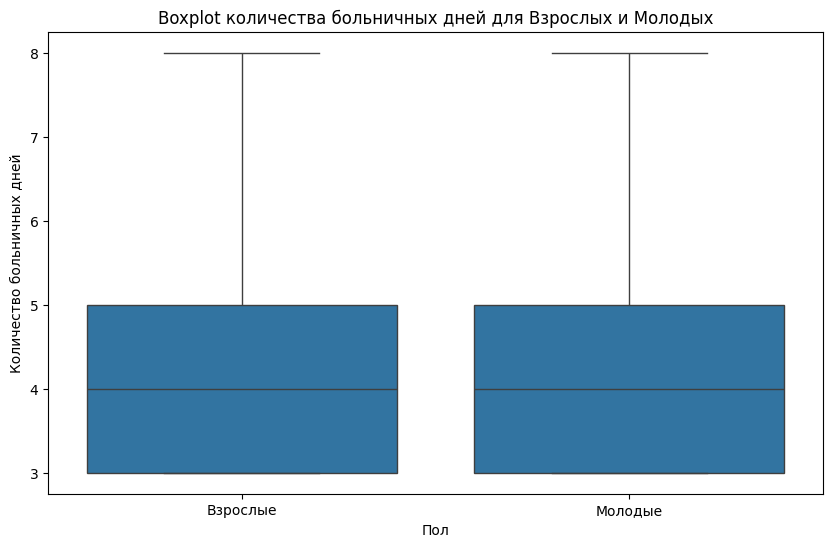

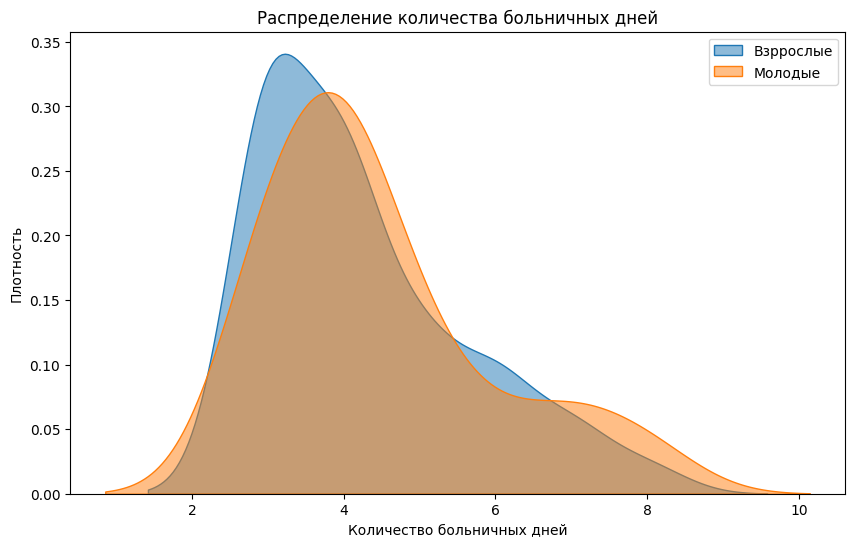

In [11]:
year_test_sick_days_hypothesis(df,2,35)

__Вывод:__ Количество Больничных дней распределено не нормально, поэтому по тесту Манна-Уитни можно сделать вывод, что разницы между взрослыми и молодыми нет.

# Создание универсальной функции для проведения теста


In [12]:
def filter_data(df, work_days, group_type, age=None):
    """
    Фильтрует данные по количеству больничных дней и типу группы (пол или возраст).
    
    Аргументы:
    df (pd.DataFrame): Датафрейм с данными.
    work_days (int): Порог количества рабочих дней для фильтрации.
    group_type (str): Тип группы для анализа ('sex' или 'age').
    age (int): Возраст, используемый для разделения на молодых и взрослых (только если group_type='age').
    
    Возвращает:
    pd.DataFrame: Отфильтрованный датафрейм.
    pd.Series: Дни больничных для группы 1.
    pd.Series: Дни больничных для группы 2.
    str: Метка для группы 1.
    str: Метка для группы 2.
    """
    df_filtered = df[df['Количество больничных дней'] > work_days].copy()
    
    if group_type == 'sex':
        group1_days = df_filtered[df_filtered['Пол'] == 'М']['Количество больничных дней']
        group2_days = df_filtered[df_filtered['Пол'] == 'Ж']['Количество больничных дней']
        group1_label = 'Мужчины'
        group2_label = 'Женщины'
        
    elif group_type == 'age':
        if age is None:
            raise ValueError("Для анализа по возрасту необходимо указать параметр 'age'.")
        
        df_filtered.loc[:, 'Возрастная группа'] = df_filtered['Возраст'].apply(lambda x: 'Взрослые' if x > age else 'Молодые')
        group1_days = df_filtered[df_filtered['Возрастная группа'] == 'Взрослые']['Количество больничных дней']
        group2_days = df_filtered[df_filtered['Возрастная группа'] == 'Молодые']['Количество больничных дней']
        group1_label = 'Взрослые'
        group2_label = 'Молодые'
    
    else:
        raise ValueError("group_type должен быть 'sex' или 'age'.")
    
    return df_filtered, group1_days, group2_days, group1_label, group2_label

def perform_statistical_test(group1_days, group2_days):
    """
    Выполняет статистические тесты для сравнения двух групп.
    
    Аргументы:
    group1_days (pd.Series): Дни больничных для группы 1.
    group2_days (pd.Series): Дни больничных для группы 2.
    
    Возвращает:
    str: Название использованного теста.
    float: Статистика теста.
    float: p-значение теста.
    """
    shapiro_group1 = shapiro(group1_days)
    shapiro_group2 = shapiro(group2_days)
    
    print(f"Тест Шапиро-Уилка для группы 1: p-значение = {shapiro_group1.pvalue}")
    print(f"Тест Шапиро-Уилка для группы 2: p-значение = {shapiro_group2.pvalue}")

    if shapiro_group1.pvalue > 0.05 and shapiro_group2.pvalue > 0.05:
        levene_stat, levene_p = levene(group1_days, group2_days)
        print(f"Тест Левена: p-значение = {levene_p}")

        if levene_p > 0.05:
            stat, p_value = ttest_ind(group1_days, group2_days, alternative='greater', equal_var=True)
            test_used = "t-test (equal variances)"
        else:
            stat, p_value = ttest_ind(group1_days, group2_days, alternative='greater', equal_var=False)
            test_used = "Welch's t-test (unequal variances)"
    else:
        stat, p_value = mannwhitneyu(group1_days, group2_days, alternative='greater')
        test_used = "Mann-Whitney U test"

    return test_used, stat, p_value

def print_results(test_used, stat, p_value, group1_label, group2_label):
    """
    Выводит результаты статистического теста.
    
    Аргументы:
    test_used (str): Название использованного теста.
    stat (float): Статистика теста.
    p_value (float): p-значение теста.
    group1_label (str): Метка для группы 1.
    group2_label (str): Метка для группы 2.
    """
    print(f"Использованный тест: {test_used}")
    print(f"Статистика теста: {stat}, p-значение: {p_value}")
    
    if p_value < 0.05:
        print(f"Гипотеза подтверждена: {group1_label} пропускают больше рабочих дней по болезни, чем {group2_label}.")
    else:
        print(f"Нет значимых различий в количестве пропусков по болезни между {group1_label} и {group2_label}.")

def plot_results(df_filtered, group1_days, group2_days, group1_label, group2_label, group_type):
    """
    Строит графики для визуализации данных.
    
    Аргументы:
    df_filtered (pd.DataFrame): Отфильтрованный датафрейм.
    group1_days (pd.Series): Дни больничных для группы 1.
    group2_days (pd.Series): Дни больничных для группы 2.
    group1_label (str): Метка для группы 1.
    group2_label (str): Метка для группы 2.
    group_type (str): Тип группы для анализа ('sex' или 'age').
    """
    # Boxplot
    plt.figure(figsize=(10, 6))
    if group_type == 'sex':
        sns.boxplot(x='Пол', y='Количество больничных дней', data=df_filtered)
        plt.xlabel('Пол')
    elif group_type == 'age':
        sns.boxplot(x='Возрастная группа', y='Количество больничных дней', data=df_filtered)
        plt.xlabel('Возрастная группа')
    plt.ylabel('Количество больничных дней')
    plt.title(f'Boxplot количества больничных дней для {group1_label} и {group2_label}')
    plt.show()

    # KDE plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(group1_days, label=group1_label, fill=True, alpha=0.5)
    sns.kdeplot(group2_days, label=group2_label, fill=True, alpha=0.5)
    plt.title('Распределение количества больничных дней')
    plt.xlabel('Количество больничных дней')
    plt.ylabel('Плотность')
    plt.legend()
    plt.show()

# Основная функция для проведения анализа
def test_sick_days_hypothesis(df, work_days, group_type, age=None):
    """
    Проводит анализ больничных дней в зависимости от группы (пол или возраст).
    
    Аргументы:
    df (pd.DataFrame): Датафрейм с данными.
    work_days (int): Порог количества рабочих дней для фильтрации.
    group_type (str): Тип группы для анализа ('sex' для анализа по полу, 'age' для анализа по возрасту).
    age (int): Возраст, используемый для разделения на молодых и взрослых (только если group_type='age').
    """
    df_filtered, group1_days, group2_days, group1_label, group2_label = filter_data(df, work_days, group_type, age)
    test_used, stat, p_value = perform_statistical_test(group1_days, group2_days)
    print_results(test_used, stat, p_value, group1_label, group2_label)
    plot_results(df_filtered, group1_days, group2_days, group1_label, group2_label, group_type)

Тест Шапиро-Уилка для группы 1: p-значение = 7.51328390607522e-09
Тест Шапиро-Уилка для группы 2: p-значение = 5.730583137143745e-07
Использованный тест: Mann-Whitney U test
Статистика теста: 2829.0, p-значение: 0.4774086565269439
Нет значимых различий в количестве пропусков по болезни между Мужчины и Женщины.


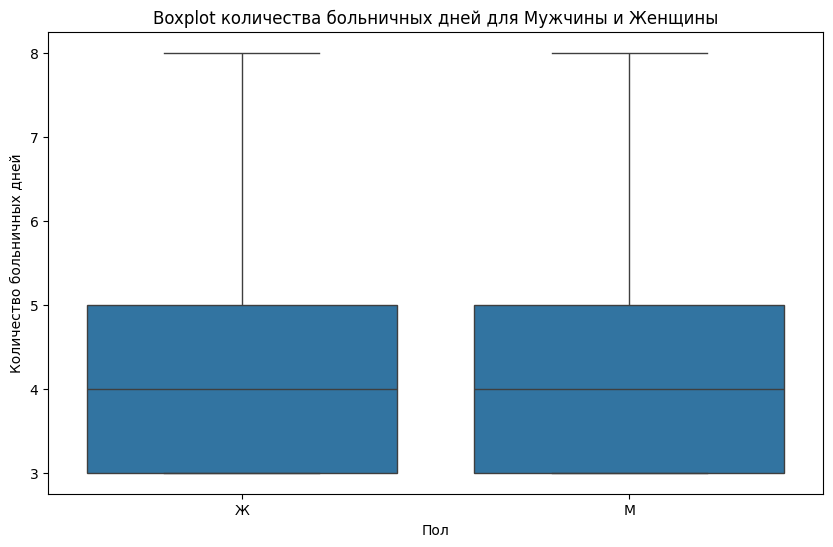

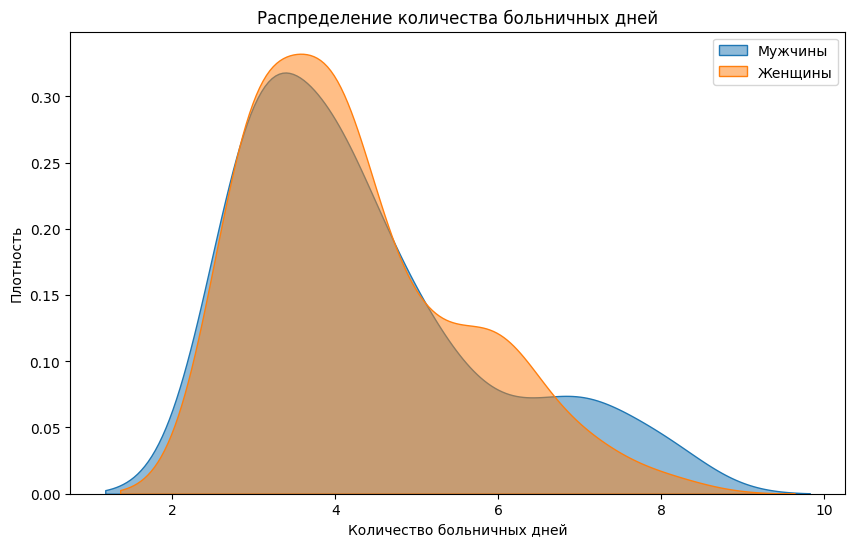

In [13]:
test_sick_days_hypothesis(df, work_days=2, group_type='sex')

Тест Шапиро-Уилка для группы 1: p-значение = 2.4903508757985295e-10
Тест Шапиро-Уилка для группы 2: p-значение = 5.5304204270799383e-05
Использованный тест: Mann-Whitney U test
Статистика теста: 1888.0, p-значение: 0.7971402175825377
Нет значимых различий в количестве пропусков по болезни между Взрослые и Молодые.


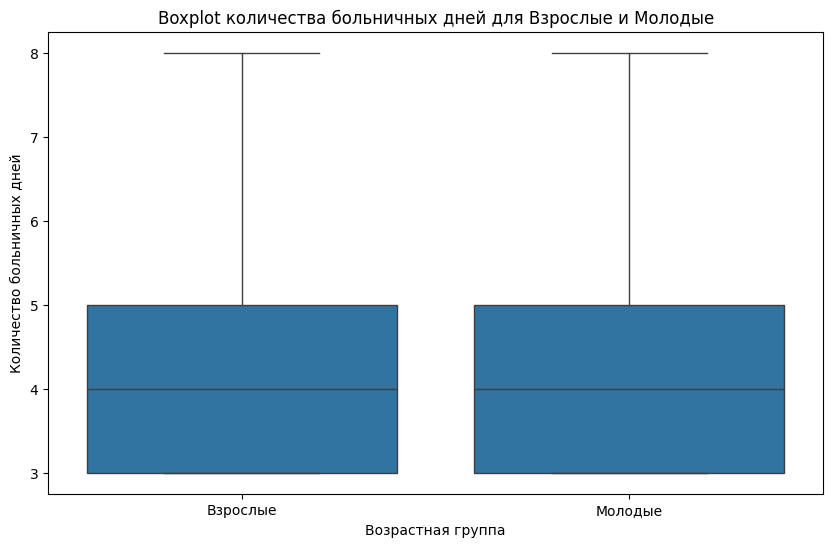

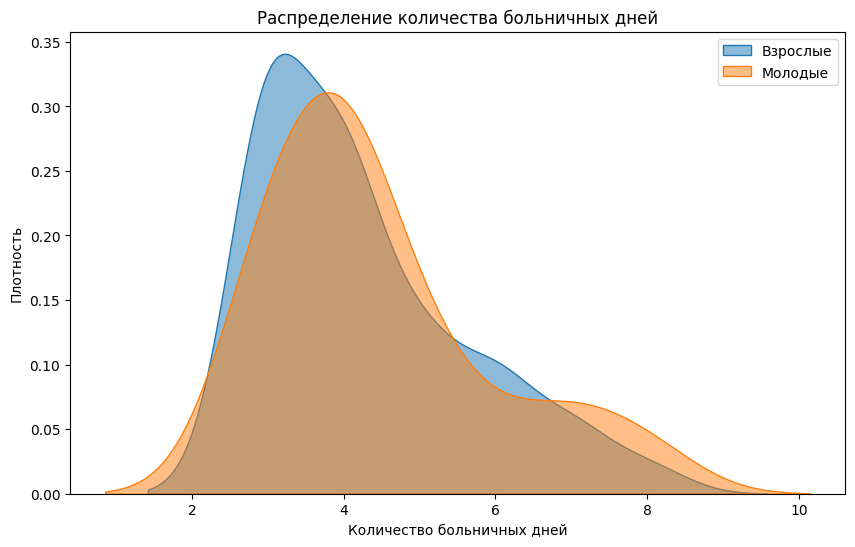

In [14]:
test_sick_days_hypothesis(df, work_days=2, group_type='age', age=35)